## 导入数据

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 解决坐标轴刻度负号乱码
plt.rcParams['axes.unicode_minus'] = False
# 解决中文乱码问题
plt.rcParams['font.sans-serif'] = ['Simhei']
#显示全部特征
pd.set_option('display.max_columns', None)

%matplotlib inline

In [52]:
# 全部行输出
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [13]:
# 导入数据
data1 = pd.read_table("D:/data/userlostprob.txt")

D:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  


In [11]:
data.head()

,label,sampleid,d,arrival,iforderpv_24h,decisionhabit_user,historyvisit_7ordernum,historyvisit_totalordernum,hotelcr,ordercanceledprecent,landhalfhours,ordercanncelednum,commentnums,starprefer,novoters,consuming_capacity,historyvisit_avghotelnum,cancelrate,historyvisit_visit_detailpagenum,delta_price1,price_sensitive,hoteluv,businessrate_pre,ordernum_oneyear,cr_pre,avgprice,lowestprice,firstorder_bu,customereval_pre2,delta_price2,commentnums_pre,customer_value_profit,commentnums_pre2,cancelrate_pre,novoters_pre2,novoters_pre,ctrip_profits,deltaprice_pre2_t1,lowestprice_pre,uv_pre,uv_pre2,lowestprice_pre2,lasthtlordergap,businessrate_pre2,cityuvs,cityorders,lastpvgap,cr,sid,visitnum_oneyear,h
0,0,24636,2016-05-18,2016-05-18,0,NaN,NaN,NaN,1.04,NaN,22.0,NaN,1089.0,NaN,1933.0,NaN,NaN,1261.0,NaN,NaN,NaN,102.607,0.25,NaN,1.03,NaN,49.0,NaN,3.2,NaN,724.0,NaN,844.0,0.03,1335.0,1249.0,NaN,29.0,46.0,58.027,74.956,615.0,NaN,0.29,12.880,3.147,NaN,NaN,7,NaN,12
1,1,24637,2016-05-18,2016-05-18,0,NaN,NaN,NaN,1.06,NaN,0.0,NaN,5612.0,NaN,6852.0,NaN,NaN,3205.0,NaN,NaN,NaN,278.373,0.51,NaN,1.07,NaN,619.0,NaN,4.9,NaN,5610.0,NaN,3789.0,0.21,5430.0,7829.0,NaN,-56.0,111.0,249.347,224.920,513.0,NaN,0.53,17.933,4.913,NaN,NaN,33,NaN,14
2,0,24641,2016-05-18,2016-05-19,0,NaN,NaN,NaN,1.05,NaN,3.0,NaN,256.0,NaN,367.0,NaN,NaN,194.0,NaN,NaN,NaN,16.133,0.61,NaN,1.12,NaN,312.0,NaN,3.9,NaN,4721.0,NaN,4341.0,0.52,5353.0,7324.0,NaN,8.0,413.0,133.093,112.063,382.0,NaN,0.60,3.993,0.760,NaN,NaN,10,NaN,19
3,0,24642,2016-05-18,2016-05-18,0,NaN,NaN,NaN,1.01,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,1.780,NaN,NaN,1.01,NaN,198.0,NaN,2.1,NaN,41.0,NaN,529.0,0.53,1004.0,81.0,NaN,-7.0,188.0,4.600,58.844,203.0,NaN,0.18,3.220,0.660,NaN,NaN,8,NaN,16
4,1,24644,2016-05-18,2016-05-19,0,NaN,NaN,NaN,1.00,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.073,NaN,NaN,1.03,NaN,NaN,NaN,1.5,NaN,NaN,NaN,NaN,1.00,1.0,NaN,NaN,-5.0,NaN,0.213,0.157,84.0,NaN,NaN,0.013,NaN,NaN,NaN,1,NaN,21


In [13]:
# 查看数据缺失值情况
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 689945 entries, 0 to 689944
Data columns (total 51 columns):
label                               689945 non-null int64
sampleid                            689945 non-null int64
d                                   689945 non-null object
arrival                             689945 non-null object
iforderpv_24h                       689945 non-null int64
decisionhabit_user                  385450 non-null float64
historyvisit_7ordernum              82915 non-null float64
historyvisit_totalordernum          386525 non-null float64
hotelcr                             689148 non-null float64
ordercanceledprecent                447831 non-null float64
landhalfhours                       661312 non-null float64
ordercanncelednum                   447831 non-null float64
commentnums                         622029 non-null float64
starprefer                          464892 non-null float64
novoters                            672918 non-null float6

In [15]:
data.isnull().mean() #查看缺失值比例

label                               0.000000
sampleid                            0.000000
d                                   0.000000
arrival                             0.000000
iforderpv_24h                       0.000000
decisionhabit_user                  0.441332
historyvisit_7ordernum              0.879824
historyvisit_totalordernum          0.439774
hotelcr                             0.001155
ordercanceledprecent                0.350918
landhalfhours                       0.041500
ordercanncelednum                   0.350918
commentnums                         0.098437
starprefer                          0.326190
novoters                            0.024679
consuming_capacity                  0.327719
historyvisit_avghotelnum            0.437816
cancelrate                          0.016984
historyvisit_visit_detailpagenum    0.554698
delta_price1                        0.366405
price_sensitive                     0.327719
hoteluv                             0.001155
businessra

In [16]:
data_lost=data.isnull().mean() #按缺失值比例进行降序排列
data_lost=data_lost.sort_values(ascending=False)
data_lost

historyvisit_7ordernum              0.879824
historyvisit_visit_detailpagenum    0.554698
firstorder_bu                       0.453590
decisionhabit_user                  0.441332
historyvisit_totalordernum          0.439774
historyvisit_avghotelnum            0.437816
delta_price1                        0.366405
delta_price2                        0.365529
customer_value_profit               0.363539
ctrip_profits                       0.354750
ordercanceledprecent                0.350918
ordercanncelednum                   0.350918
lasthtlordergap                     0.350918
ordernum_oneyear                    0.350918
avgprice                            0.337250
cr                                  0.336330
consuming_capacity                  0.327719
price_sensitive                     0.327719
starprefer                          0.326190
businessrate_pre                    0.298646
deltaprice_pre2_t1                  0.212720
lastpvgap                           0.140775
visitnum_o

In [18]:
# 查看数据形状
data.shape

(689945, 51)

In [19]:
data.describe().T # 查看量缸是否统一

,count,mean,std,min,25%,50%,75%,max
label,689945.0,0.274452,0.446238,0.000,0.000,0.000,1.000,1.000
sampleid,689945.0,628540.209625,414681.498697,24636.000,312320.000,599637.000,887460.000,2238426.000
iforderpv_24h,689945.0,0.193737,0.395226,0.000,0.000,0.000,0.000,1.000
decisionhabit_user,385450.0,5.317048,38.524483,0.000,2.000,3.000,5.000,3167.000
historyvisit_7ordernum,82915.0,1.856094,2.103862,1.000,1.000,1.000,2.000,106.000
historyvisit_totalordernum,386525.0,11.710487,17.251429,1.000,2.000,6.000,14.000,711.000
hotelcr,689148.0,1.060996,0.045264,1.000,1.030,1.050,1.090,3.180
ordercanceledprecent,447831.0,0.342119,0.354210,0.000,0.000,0.250,0.570,1.000
landhalfhours,661312.0,6.086366,12.413225,0.000,0.000,0.000,4.000,49.000
ordercanncelednum,447831.0,154.179369,398.456986,0.000,0.000,2.000,153.000,13475.000


In [20]:
# 查看监督标签数据分布情况
data.label.value_counts(dropna=False)

0    500588
1    189357
Name: label, dtype: int64

## 数据预处理

### 生产衍生变量


In [21]:
# 添加新列：提前预定=入住时间-访问时间
data['d']=pd.to_datetime(data['d'])
data['arrival']=pd.to_datetime(data['arrival'])
data['interval']=(data['arrival']-data['d']).dt.days # 天数差值
data

,label,sampleid,d,arrival,iforderpv_24h,decisionhabit_user,historyvisit_7ordernum,historyvisit_totalordernum,hotelcr,ordercanceledprecent,landhalfhours,ordercanncelednum,commentnums,starprefer,novoters,consuming_capacity,historyvisit_avghotelnum,cancelrate,historyvisit_visit_detailpagenum,delta_price1,price_sensitive,hoteluv,businessrate_pre,ordernum_oneyear,cr_pre,avgprice,lowestprice,firstorder_bu,customereval_pre2,delta_price2,commentnums_pre,customer_value_profit,commentnums_pre2,cancelrate_pre,novoters_pre2,novoters_pre,ctrip_profits,deltaprice_pre2_t1,lowestprice_pre,uv_pre,uv_pre2,lowestprice_pre2,lasthtlordergap,businessrate_pre2,cityuvs,cityorders,lastpvgap,cr,sid,visitnum_oneyear,h,advance_booking
0,0,24636,2016-05-18,2016-05-18,0,NaN,NaN,NaN,1.04,NaN,22.0,NaN,1089.0,NaN,1933.0,NaN,NaN,1261.0,NaN,NaN,NaN,102.607,0.25,NaN,1.03,NaN,49.0,NaN,3.2,NaN,724.0,NaN,844.0,0.03,1335.0,1249.0,NaN,29.0,46.0,58.027,74.956,615.0,NaN,0.29,12.880,3.147,NaN,NaN,7,NaN,12,0
1,1,24637,2016-05-18,2016-05-18,0,NaN,NaN,NaN,1.06,NaN,0.0,NaN,5612.0,NaN,6852.0,NaN,NaN,3205.0,NaN,NaN,NaN,278.373,0.51,NaN,1.07,NaN,619.0,NaN,4.9,NaN,5610.0,NaN,3789.0,0.21,5430.0,7829.0,NaN,-56.0,111.0,249.347,224.920,513.0,NaN,0.53,17.933,4.913,NaN,NaN,33,NaN,14,0
2,0,24641,2016-05-18,2016-05-19,0,NaN,NaN,NaN,1.05,NaN,3.0,NaN,256.0,NaN,367.0,NaN,NaN,194.0,NaN,NaN,NaN,16.133,0.61,NaN,1.12,NaN,312.0,NaN,3.9,NaN,4721.0,NaN,4341.0,0.52,5353.0,7324.0,NaN,8.0,413.0,133.093,112.063,382.0,NaN,0.60,3.993,0.760,NaN,NaN,10,NaN,19,1
3,0,24642,2016-05-18,2016-05-18,0,NaN,NaN,NaN,1.01,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,1.780,NaN,NaN,1.01,NaN,198.0,NaN,2.1,NaN,41.0,NaN,529.0,0.53,1004.0,81.0,NaN,-7.0,188.0,4.600,58.844,203.0,NaN,0.18,3.220,0.660,NaN,NaN,8,NaN,16,0
4,1,24644,2016-05-18,2016-05-19,0,NaN,NaN,NaN,1.00,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.073,NaN,NaN,1.03,NaN,NaN,NaN,1.5,NaN,NaN,NaN,NaN,1.00,1.0,NaN,NaN,-5.0,NaN,0.213,0.157,84.0,NaN,NaN,0.013,NaN,NaN,NaN,1,NaN,21,1
5,1,24645,2016-05-18,2016-05-20,0,NaN,NaN,NaN,1.02,NaN,0.0,NaN,15.0,NaN,30.0,NaN,NaN,54.0,NaN,NaN,NaN,10.153,NaN,NaN,1.01,NaN,130.0,NaN,0.0,NaN,49.0,NaN,49.0,0.78,51.0,51.0,NaN,NaN,408.0,4.507,4.507,408.0,NaN,NaN,2.880,0.427,NaN,NaN,1,NaN,21,2
6,0,24647,2016-05-18,2016-05-25,0,NaN,NaN,NaN,1.12,NaN,0.0,NaN,2578.0,NaN,4521.0,NaN,NaN,2883.0,NaN,NaN,NaN,99.287,NaN,NaN,1.00,NaN,678.0,NaN,0.0,NaN,NaN,NaN,NaN,0.38,NaN,NaN,NaN,0.0,145.0,5.547,5.547,145.0,NaN,NaN,4.427,0.493,NaN,NaN,1,NaN,22,7
7,0,24650,2016-05-18,2016-05-20,0,3.0,NaN,21.0,1.11,0.79,0.0,395.0,NaN,75.4,8.0,39.0,3.0,35.0,NaN,135.0,62.0,1.373,0.49,21.0,1.09,363.0,80.0,13.0,2.3,159.0,137.0,4.956,472.0,0.62,625.0,186.0,3.440,-4.0,228.0,8.660,25.985,204.0,10475.0,0.53,12.713,1.987,7566.0,1.50,23,1265.0,17,2
8,0,24652,2016-05-18,2016-05-19,0,13.0,NaN,NaN,1.08,NaN,0.0,NaN,2572.0,NaN,2987.0,NaN,13.0,2887.0,27.0,NaN,NaN,163.880,0.41,NaN,1.09,NaN,100.0,NaN,2.3,NaN,1688.0,NaN,1688.0,0.39,1081.0,2147.0,NaN,0.0,128.0,127.087,68.110,99.0,NaN,0.41,5.393,0.860,15.0,1.00,20,596.0,20,1
9,0,24653,2016-05-18,2016-06-08,1,2.0,NaN,7.0,1.07,0.86,47.0,6.0,NaN,70.0,88.0,26.0,3.2,1303.0,59.0,197.0,8.0,67.100,0.51,7.0,1.08,307.0,208.0,3.0,1.7,116.0,1573.0,1.679,709.0,0.43,1031.0,2945.0,1.413,NaN,110.0,90.260,56.131,191.0,18873.0,0.52,3.093,0.287,288.0,1.00,31,21926.0,7,21


In [22]:
# 删除缺失值占比87%的列
data=data.drop(["historyvisit_7ordernum"],axis=1)

In [23]:
# 过滤无用的维度
filter_feature=['sampleid','d','arrival','label']
features=[]
for x in data.columns: # 取特征
    if x not in filter_feature:
        features.append(x)

data_x=data[features]
data_y=data['label']

### 负数处理

customer_value_profit、ctrip_profits替换为0

delta_price1、delta_price2、lowestprice按中位数处理：

In [24]:
data_x.loc[data_x.ctrip_profits<0,'ctrip_profits'] = 0
data_x.loc[data_x.customer_value_profit<0,'customer_value_profit'] = 0
data_x.loc[data_x.delta_price1<0,'delta_price1'] = data_x['delta_price1'].median()
data_x.loc[data_x.lowestprice<0,'lowestprice'] = data_x['lowestprice'].median()
data_x.loc[data_x.delta_price2<0,'delta_price2'] = data_x['delta_price2'].median()

D:\Program Files\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [25]:
data_x.describe().T

,count,mean,std,min,25%,50%,75%,max
iforderpv_24h,689945.0,0.193737,0.395226,0.000,0.000,0.000,0.000,1.000
decisionhabit_user,385450.0,5.317048,38.524483,0.000,2.000,3.000,5.000,3167.000
historyvisit_totalordernum,386525.0,11.710487,17.251429,1.000,2.000,6.000,14.000,711.000
hotelcr,689148.0,1.060996,0.045264,1.000,1.030,1.050,1.090,3.180
ordercanceledprecent,447831.0,0.342119,0.354210,0.000,0.000,0.250,0.570,1.000
landhalfhours,661312.0,6.086366,12.413225,0.000,0.000,0.000,4.000,49.000
ordercanncelednum,447831.0,154.179369,398.456986,0.000,0.000,2.000,153.000,13475.000
commentnums,622029.0,1272.090888,2101.871601,0.000,115.000,514.000,1670.000,34189.000
starprefer,464892.0,67.532304,19.175094,0.000,53.300,69.400,80.300,100.000
novoters,672918.0,1706.247901,2811.690007,1.000,157.000,692.000,2196.000,45455.000


### 缺失值填充

In [26]:
data_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 689945 entries, 0 to 689944
Data columns (total 47 columns):
iforderpv_24h                       689945 non-null int64
decisionhabit_user                  385450 non-null float64
historyvisit_totalordernum          386525 non-null float64
hotelcr                             689148 non-null float64
ordercanceledprecent                447831 non-null float64
landhalfhours                       661312 non-null float64
ordercanncelednum                   447831 non-null float64
commentnums                         622029 non-null float64
starprefer                          464892 non-null float64
novoters                            672918 non-null float64
consuming_capacity                  463837 non-null float64
historyvisit_avghotelnum            387876 non-null float64
cancelrate                          678227 non-null float64
historyvisit_visit_detailpagenum    307234 non-null float64
delta_price1                        437146 non-null

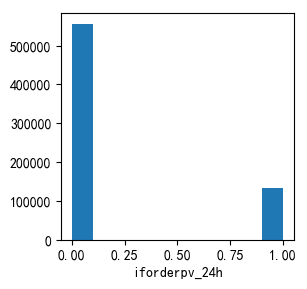

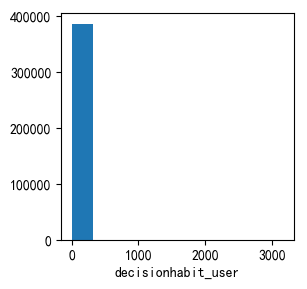

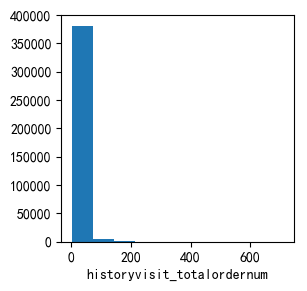

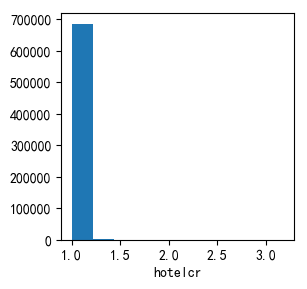

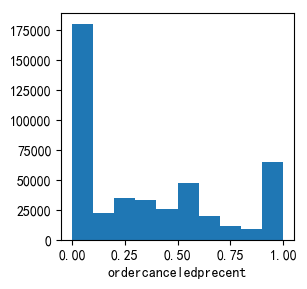

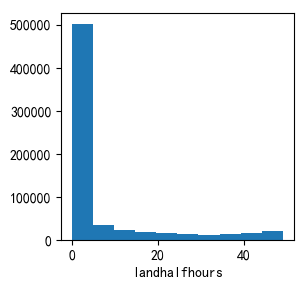

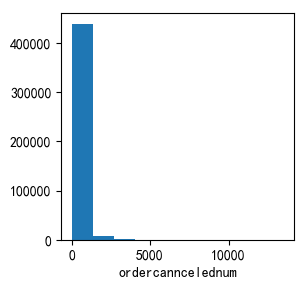

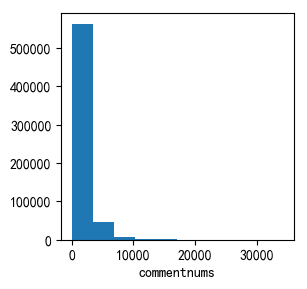

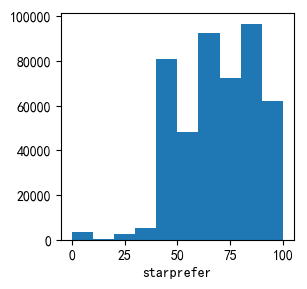

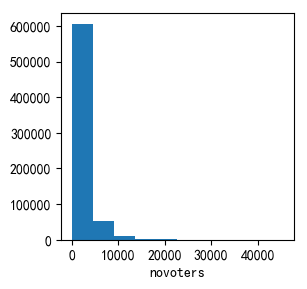

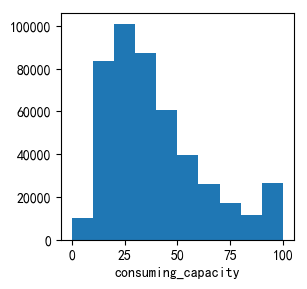

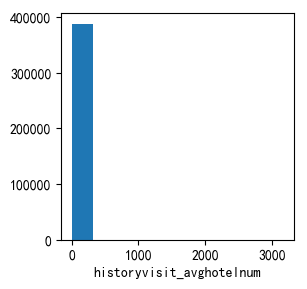

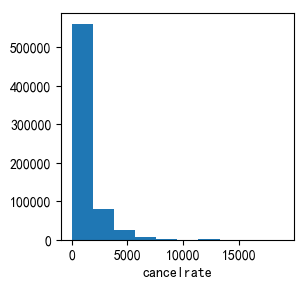

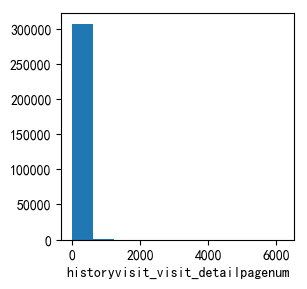

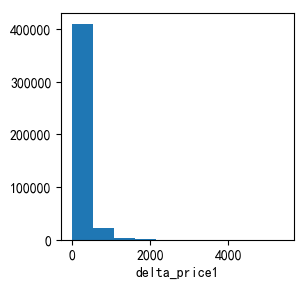

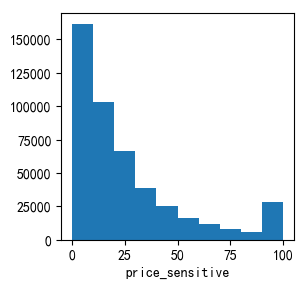

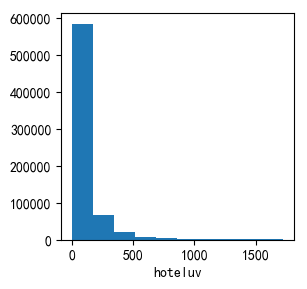

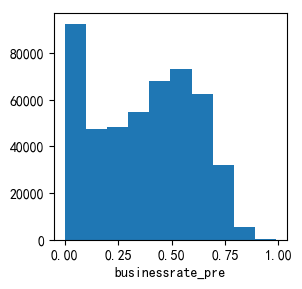

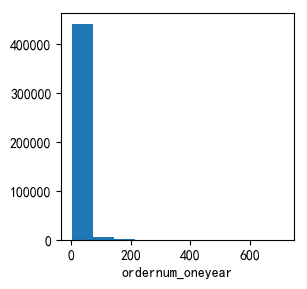

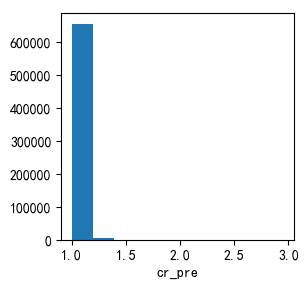

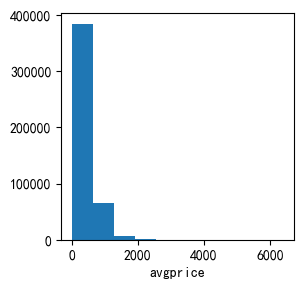

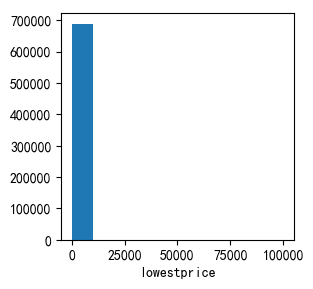

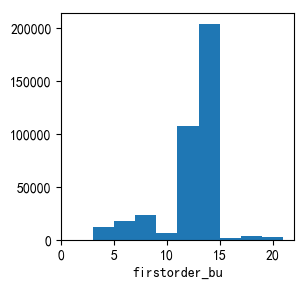

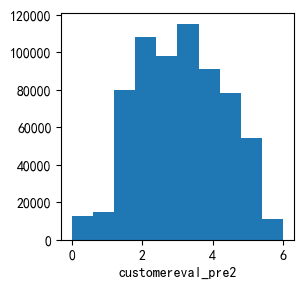

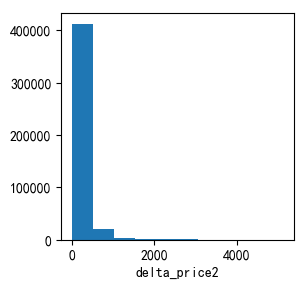

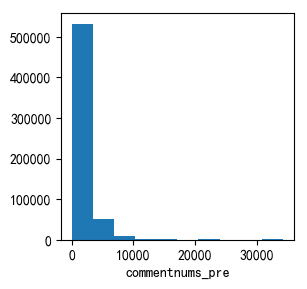

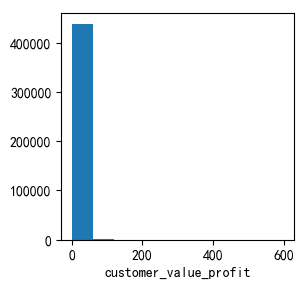

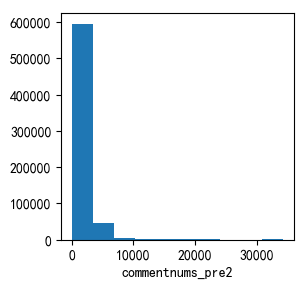

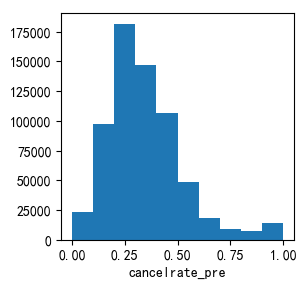

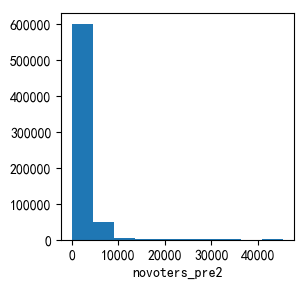

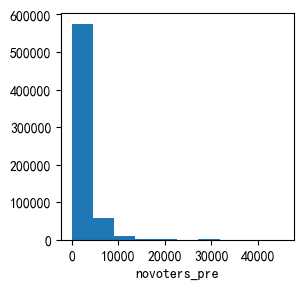

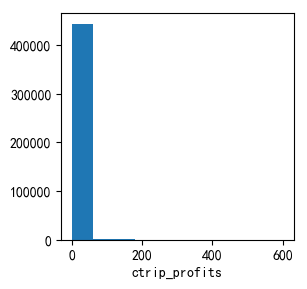

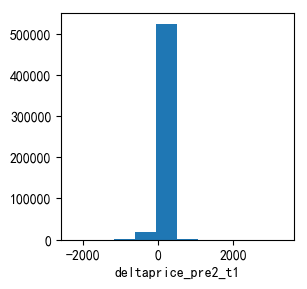

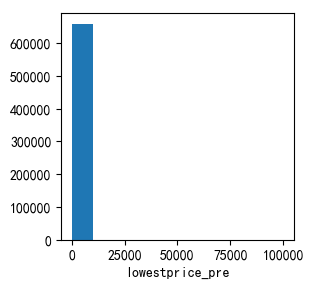

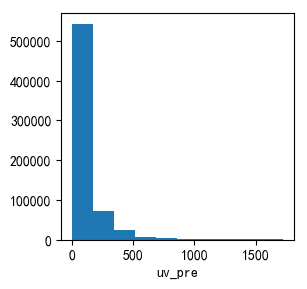

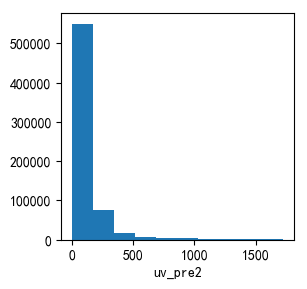

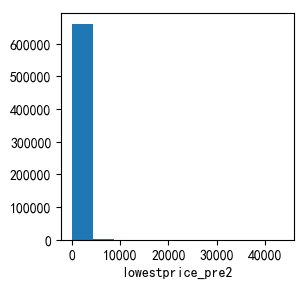

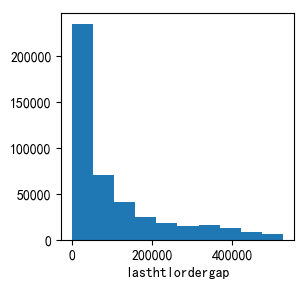

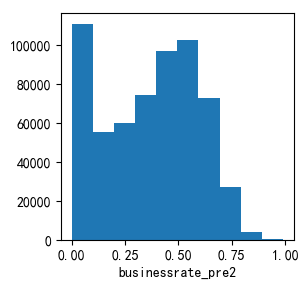

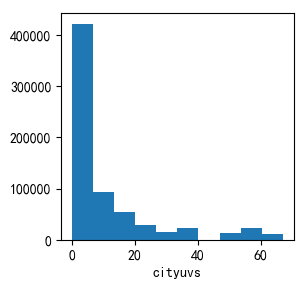

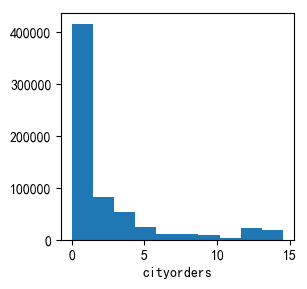

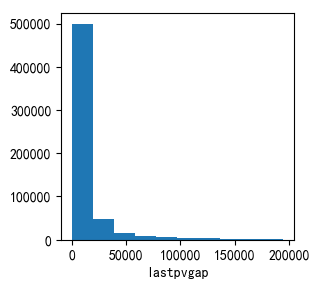

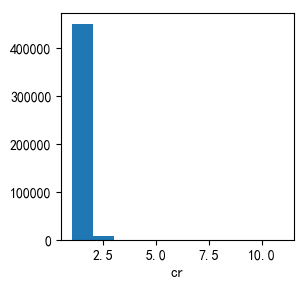

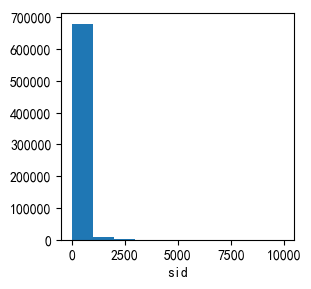

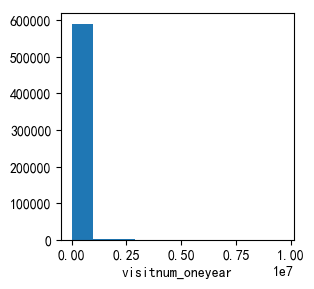

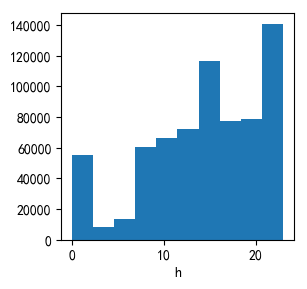

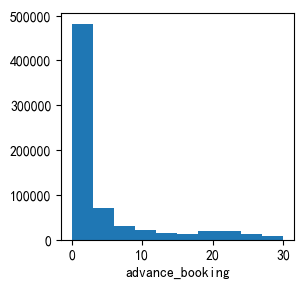

In [32]:
for i in range(0,47):
    plt.figure(figsize=(3,3),dpi=100)
    plt.hist(data_x[data_x.columns[i]].dropna().get_values())
    plt.xlabel(data_x.columns[i])
plt.show()


观察图像形状，趋于正态分布的使用均值填充，偏态分布使用中位数填充

consuming_capacity、businessrate_pre2、cancelrate_pre、businessrate_pre、customereval_pre2趋于正态分布

In [33]:
# 缺失值填充
def nan_fill(df):
    filter_mean=['consuming_capacity','businessrate_pre2','cancelrate_pre','businessrate_pre','customereval_pre2']
    for col in df.columns:
        if col in filter_mean:
            df[col]=df[col].fillna(df[col].mean())
        else:
            df[col]=df[col].fillna(df[col].median())
    return df

data_xx=nan_fill(data_x)

D:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
D:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [34]:
data_xx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 689945 entries, 0 to 689944
Data columns (total 47 columns):
iforderpv_24h                       689945 non-null int64
decisionhabit_user                  689945 non-null float64
historyvisit_totalordernum          689945 non-null float64
hotelcr                             689945 non-null float64
ordercanceledprecent                689945 non-null float64
landhalfhours                       689945 non-null float64
ordercanncelednum                   689945 non-null float64
commentnums                         689945 non-null float64
starprefer                          689945 non-null float64
novoters                            689945 non-null float64
consuming_capacity                  689945 non-null float64
historyvisit_avghotelnum            689945 non-null float64
cancelrate                          689945 non-null float64
historyvisit_visit_detailpagenum    689945 non-null float64
delta_price1                        689945 non-null

### 极值处理

明显有异常大和异常小的值，这里分别用1%和99%分位数替换超过上下限的值。

In [35]:
# 极值处理
for col in data_xx.columns:
    percent1=np.percentile(data_xx[col],1)       # 该列的1%分位数
    percent99=np.percentile(data_xx[col],99)       # 该列的99%分位数
    
    data_xx.loc[data_xx[col]<percent1,col]=percent1    # 小于1%分位数的，用1%分位数填充
    data_xx.loc[data_xx[col]>percent99,col]=percent99    # 大于99%分位数的，用99%分位数填充

D:\Program Files\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
D:\Program Files\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
D:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [36]:
data_xx.describe().T

,count,mean,std,min,25%,50%,75%,max
iforderpv_24h,689945.0,0.193737,0.395226,0.000,0.000,0.000000,0.000,1.00000
decisionhabit_user,689945.0,3.772512,3.273224,1.000,3.000,3.000000,3.000,22.00000
historyvisit_totalordernum,689945.0,8.892426,10.759942,1.000,5.000,6.000000,7.000,67.00000
hotelcr,689945.0,1.060494,0.042356,1.000,1.030,1.050000,1.090,1.19000
ordercanceledprecent,689945.0,0.309793,0.288738,0.000,0.050,0.250000,0.400,1.00000
landhalfhours,689945.0,5.827125,12.190123,0.000,0.000,0.000000,3.000,48.00000
ordercanncelednum,689945.0,92.387280,250.302690,0.000,1.000,2.000000,5.000,1489.00000
commentnums,689945.0,1142.892925,1589.907911,1.000,144.000,514.000000,1466.000,8323.00000
starprefer,689945.0,68.318289,15.177960,30.000,60.000,69.400000,77.100,100.00000
novoters,689945.0,1607.913912,2232.696936,1.000,165.000,692.000000,2128.000,11549.00000


In [37]:
data_xx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 689945 entries, 0 to 689944
Data columns (total 47 columns):
iforderpv_24h                       689945 non-null float64
decisionhabit_user                  689945 non-null float64
historyvisit_totalordernum          689945 non-null float64
hotelcr                             689945 non-null float64
ordercanceledprecent                689945 non-null float64
landhalfhours                       689945 non-null float64
ordercanncelednum                   689945 non-null float64
commentnums                         689945 non-null float64
starprefer                          689945 non-null float64
novoters                            689945 non-null float64
consuming_capacity                  689945 non-null float64
historyvisit_avghotelnum            689945 non-null float64
cancelrate                          689945 non-null float64
historyvisit_visit_detailpagenum    689945 non-null float64
delta_price1                        689945 non-nu

## 相关性分析

In [38]:
data_xx.to_csv('处理后的x.csv',index=False)

In [41]:
hyl=data_xx.loc[:,'hoteluv':'deltaprice_pre2_t1']

In [42]:
hyl.to_csv('hyl.csv',index=False)

In [45]:
data_x.describe().T

,count,mean,std,min,25%,50%,75%,max
iforderpv_24h,689945.0,0.193737,0.395226,0.000,0.000,0.000000,0.000,1.00000
decisionhabit_user,689945.0,3.772512,3.273224,1.000,3.000,3.000000,3.000,22.00000
historyvisit_totalordernum,689945.0,8.892426,10.759942,1.000,5.000,6.000000,7.000,67.00000
hotelcr,689945.0,1.060494,0.042356,1.000,1.030,1.050000,1.090,1.19000
ordercanceledprecent,689945.0,0.309793,0.288738,0.000,0.050,0.250000,0.400,1.00000
landhalfhours,689945.0,5.827125,12.190123,0.000,0.000,0.000000,3.000,48.00000
ordercanncelednum,689945.0,92.387280,250.302690,0.000,1.000,2.000000,5.000,1489.00000
commentnums,689945.0,1142.892925,1589.907911,1.000,144.000,514.000000,1466.000,8323.00000
starprefer,689945.0,68.318289,15.177960,30.000,60.000,69.400000,77.100,100.00000
novoters,689945.0,1607.913912,2232.696936,1.000,165.000,692.000000,2128.000,11549.00000


In [46]:
corr_mat=data_xx.corr()

In [47]:
corr_mat

,iforderpv_24h,decisionhabit_user,historyvisit_totalordernum,hotelcr,ordercanceledprecent,landhalfhours,ordercanncelednum,commentnums,starprefer,novoters,consuming_capacity,historyvisit_avghotelnum,cancelrate,historyvisit_visit_detailpagenum,delta_price1,price_sensitive,hoteluv,businessrate_pre,ordernum_oneyear,cr_pre,avgprice,lowestprice,firstorder_bu,customereval_pre2,delta_price2,commentnums_pre,customer_value_profit,commentnums_pre2,cancelrate_pre,novoters_pre2,novoters_pre,ctrip_profits,deltaprice_pre2_t1,lowestprice_pre,uv_pre,uv_pre2,lowestprice_pre2,lasthtlordergap,businessrate_pre2,cityuvs,cityorders,lastpvgap,cr,sid,visitnum_oneyear,h,advance_booking
iforderpv_24h,1.000000,-0.000903,-0.018408,0.024071,0.003451,0.233447,-0.015206,0.013740,-0.021827,0.015740,-0.029280,-0.005782,0.012095,0.059875,-0.022466,-0.022761,0.002599,0.009458,-0.014624,0.061656,-0.040083,-0.041892,0.009079,-0.031826,-0.026489,0.044817,-0.029591,0.032517,-0.028610,0.036947,0.049872,-0.025420,0.006945,-0.037532,0.019053,0.009943,-0.044412,-0.017532,0.012048,0.039251,0.037020,-0.005508,-0.000848,-0.036166,0.073917,-0.012849,-0.011125
decisionhabit_user,-0.000903,1.000000,-0.009466,-0.017211,0.020315,0.025155,-0.005466,-0.009650,-0.039366,-0.010207,-0.035295,0.892336,-0.009499,0.335395,-0.020327,0.009389,-0.002064,-0.025606,-0.017379,-0.014132,-0.035236,-0.012223,-0.008325,-0.010712,-0.022074,-0.007829,-0.037240,-0.008029,-0.002093,-0.009121,-0.008773,-0.042520,-0.007752,-0.010143,-0.001354,-0.000633,-0.010256,-0.024876,-0.028658,-0.011142,-0.012221,-0.059369,0.032008,0.004823,0.003262,-0.015992,0.018221
historyvisit_totalordernum,-0.018408,-0.009466,1.000000,0.095866,0.102506,0.014410,0.644097,0.031343,0.104964,0.034291,0.058323,0.035688,0.036883,0.098634,0.055332,0.017739,-0.006474,0.118741,0.928864,0.094230,0.071709,0.037468,0.035300,0.096547,0.052932,0.023597,0.555246,0.031208,-0.027731,0.035852,0.025678,0.486986,0.017496,0.043293,-0.012691,-0.012297,0.047232,-0.239825,0.134727,0.025850,0.030754,-0.110334,0.315193,0.298470,0.031865,0.002236,-0.079466
hotelcr,0.024071,-0.017211,0.095866,1.000000,0.023404,-0.009319,0.070682,0.077973,-0.037118,0.111510,-0.096958,-0.022174,0.145374,-0.018252,-0.007506,-0.027991,-0.195894,0.393174,0.092868,0.455088,-0.087715,-0.212134,0.017699,-0.018209,0.007050,-0.042322,0.008420,-0.057016,0.045860,-0.037198,-0.028255,0.011452,0.025691,-0.149879,-0.193813,-0.221810,-0.184937,-0.036398,0.462603,0.010997,0.031117,0.008732,0.104793,0.018775,0.012877,0.019573,-0.138218
ordercanceledprecent,0.003451,0.020315,0.102506,0.023404,1.000000,-0.000491,0.362303,-0.010056,-0.068822,-0.010232,-0.061014,0.028090,-0.009772,0.011411,-0.036550,-0.004368,-0.018940,0.027987,0.113427,0.024650,-0.050481,-0.011623,-0.005747,-0.011895,-0.038053,-0.011853,0.016213,-0.014313,0.021953,-0.014747,-0.011903,0.020009,-0.005781,-0.011811,-0.020047,-0.022130,-0.012575,0.054889,0.033394,0.004880,0.006128,-0.007433,-0.080300,0.060505,0.013412,0.000357,-0.005313
landhalfhours,0.233447,0.025155,0.014410,-0.009319,-0.000491,1.000000,0.011840,0.036527,0.006622,0.037715,0.002310,0.030091,0.039000,0.175997,0.010923,-0.000761,0.041235,-0.026266,0.024762,0.011789,0.003704,0.012501,-0.000785,0.036590,0.001920,0.059744,0.007725,0.056329,-0.047855,0.057026,0.061994,0.006446,0.008655,0.024001,0.057284,0.051673,0.030444,-0.015678,-0.028497,0.045452,0.043500,-0.054367,-0.011540,0.039231,0.108321,0.001964,-0.034362
ordercanncelednum,-0.015206,-0.005466,0.644097,0.070682,0.362303,0.011840,1.000000,0.021125,0.057849,0.022873,0.014271,0.019565,0.024535,0.049001,0.043845,0.007129,-0.008243,0.092955,0.697471,0.071068,0.033386,0.029601,0.015767,0.075713,0.039229,0.016432,0.352043,0.020932,-0.015835,0.023322,0.017448,0.323278,0.007086,0.034699,-0.011653,-0.013259,0.038869,-0.077737,0.103838,0.023551,0.027659,-0.069852,0.181734,0.241964,0.043761,-0.003672,-0.067534
commentnums,0.013740,-0.009650,0.031343,0.077973,-0.010056,0.036527,0.021125,1.000000,0.167134,0.986627,0.1727

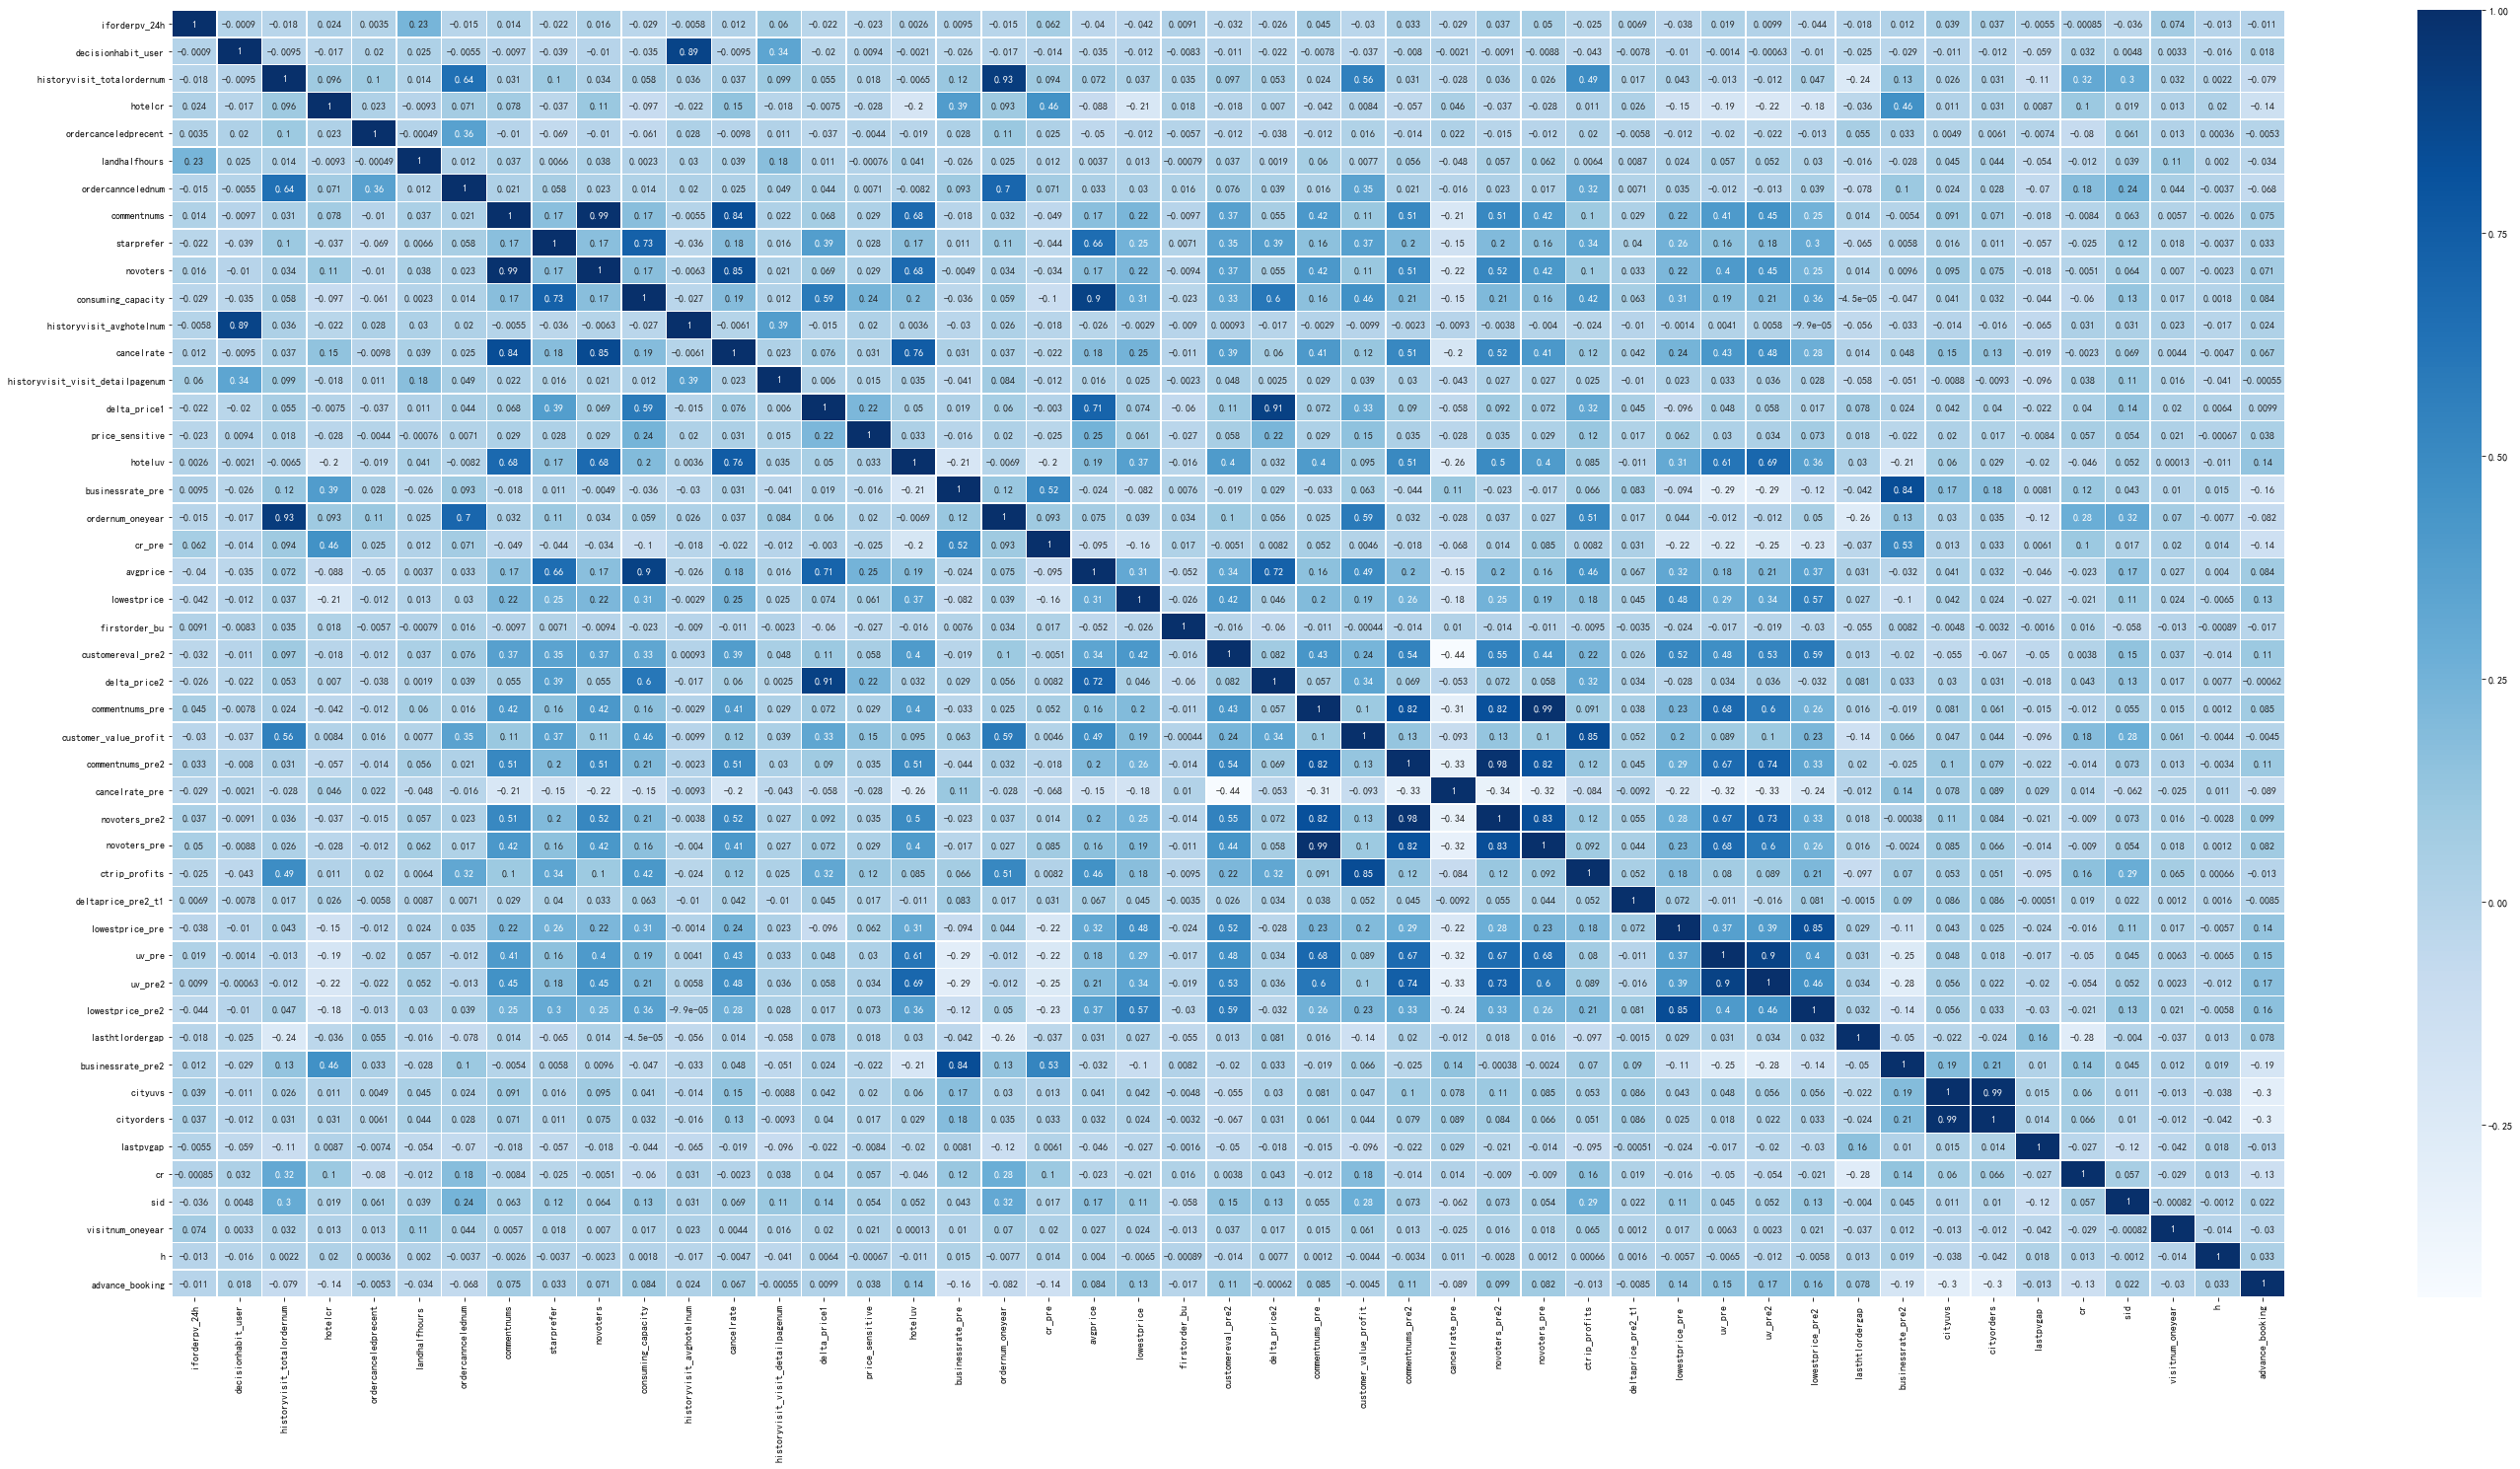

In [50]:
fig,ax = plt.subplots(figsize=(48, 24))
sns.heatmap(corr_mat, xticklabels=True, yticklabels=True, square=False, linewidths=.5, annot=True, cmap='Blues')

In [2]:
data=pd.read_csv("D:\study\处理后的x.csv")

In [29]:
data.head()

,iforderpv_24h,decisionhabit_user,historyvisit_totalordernum,hotelcr,ordercanceledprecent,landhalfhours,ordercanncelednum,commentnums,starprefer,novoters,consuming_capacity,historyvisit_avghotelnum,cancelrate,historyvisit_visit_detailpagenum,delta_price1,price_sensitive,hoteluv,businessrate_pre,ordernum_oneyear,cr_pre,avgprice,lowestprice,firstorder_bu,customereval_pre2,delta_price2,commentnums_pre,customer_value_profit,commentnums_pre2,cancelrate_pre,novoters_pre2,novoters_pre,ctrip_profits,deltaprice_pre2_t1,lowestprice_pre,uv_pre,uv_pre2,lowestprice_pre2,lasthtlordergap,businessrate_pre2,cityuvs,cityorders,lastpvgap,cr,sid,visitnum_oneyear,h,advance_booking
0,0.0,3.0,6.0,1.04,0.25,22.0,2.0,1089.0,69.4,1933.0,39.15414,4.0,1261.0,18.0,81.0,16.0,102.607,0.250000,6.0,1.03,350.0,49.0,13.0,3.2,69.0,724.0,0.991,844.0,0.06,1335.0,1249.0,1.347,29.0,46.0,58.027,74.956,615.0,46890.0,0.290000,12.880,3.147,2848.0,1.05,7.0,1315.0,12.0,0.0
1,0.0,3.0,6.0,1.06,0.25,0.0,2.0,5612.0,69.4,6852.0,39.15414,4.0,3205.0,18.0,81.0,16.0,278.373,0.510000,6.0,1.07,350.0,619.0,13.0,4.9,69.0,5610.0,0.991,3789.0,0.21,5430.0,7829.0,1.347,-56.0,111.0,249.347,224.920,513.0,46890.0,0.530000,17.933,4.913,2848.0,1.05,33.0,1315.0,14.0,0.0
2,0.0,3.0,6.0,1.05,0.25,3.0,2.0,256.0,69.4,367.0,39.15414,4.0,194.0,18.0,81.0,16.0,16.133,0.610000,6.0,1.12,350.0,312.0,13.0,3.9,69.0,4721.0,0.991,4341.0,0.52,5353.0,7324.0,1.347,8.0,413.0,133.093,112.063,382.0,46890.0,0.600000,3.993,0.760,2848.0,1.05,10.0,1315.0,19.0,1.0
3,0.0,3.0,6.0,1.01,0.25,2.0,2.0,514.0,69.4,692.0,39.15414,4.0,3.0,18.0,81.0,16.0,1.780,0.372717,6.0,1.01,350.0,198.0,13.0,2.1,69.0,41.0,0.991,529.0,0.53,1004.0,81.0,1.347,-7.0,188.0,4.600,58.844,203.0,46890.0,0.180000,3.220,0.660,2848.0,1.05,8.0,1315.0,16.0,0.0
4,0.0,3.0,6.0,1.00,0.25,0.0,2.0,514.0,69.4,692.0,39.15414,4.0,503.0,18.0,81.0,16.0,0.167,0.372717,6.0,1.03,350.0,200.0,13.0,1.5,69.0,592.0,0.991,768.0,1.00,5.0,783.0,1.347,-5.0,208.0,0.253,0.527,84.0,46890.0,0.368237,0.013,0.627,2848.0,1.05,1.0,1315.0,21.0,1.0


KeyError: 'lasthtlordergap'

## 导入特征处理后的文件

In [6]:
# 导入数据
data = pd.read_excel("D:/study/data/python/fverion_data.xlsx",)

In [7]:
data.head()

,Unnamed: 0,label,iforderpv_24h,hotelcr,ordercanceledprecent,landhalfhours,ordercanncelednum,starprefer,historyvisit_avghotelnum,cancelrate,historyvisit_visit_detailpagenum,delta_price1,price_sensitive,hoteluv,businessrate_pre,ordernum_oneyear,cr_pre,lowestprice,customereval_pre2,delta_price2,customer_value_profit,cancelrate_pre,novoters_pre2,novoters_pre,ctrip_profits,deltaprice_pre2_t1,lowestprice_pre,uv_pre,uv_pre2,lowestprice_pre2,lasthtlordergap,businessrate_pre2,lastpvgap,cr,sid,visitnum_oneyear,h,interval,consume_level,hotel_hot,city_hot
0,0,0,0,1.04,0.342119,22,2,67.532304,5.4,1261,35.304029,157.08399,24.645863,102.607,0.250000,6,1.03,49,3.2,69,0.991,0.06,1335.0,1249,1.347,29,46.00000,58.027,74.956,615.0,101830.9194,0.290000,12049.409382,1.136586,7,1315,12,0,-44.480995,229.750603,2.370022
1,1,1,0,1.06,0.342119,0,2,67.532304,5.4,3205,35.304029,157.08399,24.645863,278.373,0.510000,6,1.07,619,4.9,69,0.991,0.21,5430.0,7829,1.347,-56,111.00000,249.347,224.920,513.0,101830.9194,0.530000,12049.409382,1.136586,33,1315,14,0,-44.480995,6863.459866,7.681826
2,2,0,0,1.05,0.342119,3,2,67.532304,5.4,194,35.304029,157.08399,24.645863,16.133,0.610000,6,1.12,312,3.9,69,0.991,0.52,5353.0,7324,1.347,8,413.00000,133.093,112.063,382.0,101830.9194,0.600000,12049.409382,1.136586,10,1315,19,1,-44.480995,-1528.146522,-6.820512
3,3,0,0,1.01,0.342119,2,2,67.532304,5.4,3,35.304029,157.08399,24.645863,1.780,0.372717,6,1.01,198,2.1,69,0.991,0.53,1004.0,81,1.347,-7,188.00000,4.600,58.844,203.0,101830.9194,0.180000,12049.409382,1.136586,8,1315,16,0,-44.480995,-1113.672850,-7.597215
4,4,1,0,1.00,0.342119,0,2,67.532304,5.4,503,35.304029,157.08399,24.645863,0.167,0.372717,6,1.03,200,1.5,69,0.991,1.00,5.0,783,1.347,-5,157.08399,0.213,0.157,84.0,101830.9194,0.368237,12049.409382,1.136586,1,1315,21,1,-44.480995,-1113.672850,-10.396037


In [39]:
data['lasthtlordergap'].describe([0.01,.25,.50,.75,.90,.95,.99])

count    689945.000000
mean     101830.919401
std       98921.924830
min           0.000000
1%          360.000000
25%       29358.000000
50%      101830.919400
75%      101830.919400
90%      231892.000000
95%      341810.600000
99%      465565.000000
max      527026.000000
Name: lasthtlordergap, dtype: float64

In [40]:
data['ordernum_oneyear'].describe([0.01,.25,.50,.75,.90,.95,.99])

count    689945.000000
mean          9.345957
std          11.623763
min           1.000000
1%            1.000000
25%           4.000000
50%           6.000000
75%           8.000000
90%          21.000000
95%          33.000000
99%          70.000000
max          70.000000
Name: ordernum_oneyear, dtype: float64

In [41]:
data['consume_level'].describe([0.01,.25,.50,.75,.90,.95,.99])

count    6.899450e+05
mean    -3.321496e-13
std      2.148006e+02
min     -2.973360e+02
1%      -2.959498e+02
25%     -1.044443e+02
50%     -4.448099e+01
75%      2.737898e+01
90%      2.616416e+02
95%      4.469677e+02
99%      9.558176e+02
max      9.616389e+02
Name: consume_level, dtype: float64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 689945 entries, 0 to 689944
Data columns (total 41 columns):
Unnamed: 0                          689945 non-null int64
label                               689945 non-null int64
iforderpv_24h                       689945 non-null int64
hotelcr                             689945 non-null float64
ordercanceledprecent                689945 non-null float64
landhalfhours                       689945 non-null int64
ordercanncelednum                   689945 non-null int64
starprefer                          689945 non-null float64
historyvisit_avghotelnum            689945 non-null float64
cancelrate                          689945 non-null int64
historyvisit_visit_detailpagenum    689945 non-null float64
delta_price1                        689945 non-null float64
price_sensitive                     689945 non-null float64
hoteluv                             689945 non-null float64
businessrate_pre                    689945 non-null float64
o

## 建模

### 数据标准化

In [9]:
# 数据标准化
from sklearn.preprocessing import StandardScaler

y=data['label']
x=data.drop(['label','Unnamed: 0'],axis=1)

scaler = StandardScaler()
scaler.fit(x)

X= scaler.transform(x)

D:\Program Files\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
D:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  # Remove the CWD from sys.path while we load stuff.


### 拆分训练和测试集

In [10]:
# 拆分训练集和测试集
from sklearn.model_selection import train_test_split, GridSearchCV

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size= 0.2,random_state=666)

### 逻辑回归

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

lr = LogisticRegression()                                        # 实例化一个LR模型
lr.fit(X_train,y_train)                                          # 训练模型
y_prob = lr.predict_proba(X_test)[:,1]                           # 预测1类的概率 
y_pred = lr.predict(X_test)                                      # 模型对测试集的预测结果
fpr_lr,tpr_lr,threshold_lr = metrics.roc_curve(y_test,y_prob)    # 获取真阳率、伪阳率、阈值

auc_lr = metrics.auc(fpr_lr,tpr_lr)                              # AUC得分
score_lr = metrics.accuracy_score(y_test,y_pred)                 # 模型准确率
print([score_lr,auc_lr])


D:\Program Files\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

[0.7375225561457798, 0.7005423279519412]


### 决策树

In [12]:
from sklearn import tree
from sklearn import metrics

dtc = tree.DecisionTreeClassifier()                              # 建立决策树模型
dtc.fit(X_train,y_train)                                         # 训练模型
y_prob = dtc.predict_proba(X_test)[:,1]                          # 预测1类的概率
y_pred = dtc.predict(X_test)                                     # 模型对测试集的预测结果 
fpr_dtc,tpr_dtc,threshod_dtc= metrics.roc_curve(y_test,y_prob)   # 获取真阳率、伪阳率、阈值
score_dtc = metrics.accuracy_score(y_test,y_pred)                
auc_dtc = metrics.auc(fpr_dtc,tpr_dtc) 
print([score_dtc,auc_dtc])

[0.8783236344926045, 0.8518431204178563]


### 随机森林

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

rfc = RandomForestClassifier()                                     # 建立随机森林分类器
rfc.fit(X_train,y_train)                                           # 训练随机森林模型
y_prob = rfc.predict_proba(X_test)[:,1]                            # 预测1类的概率
y_pred=rfc.predict(X_test)                                         # 模型对测试集的预测结果
fpr_rfc,tpr_rfc,threshold_rfc = metrics.roc_curve(y_test,y_prob)   # 获取真阳率、伪阳率、阈值  
auc_rfc = metrics.auc(fpr_rfc,tpr_rfc)                             # AUC得分
score_rfc = metrics.accuracy_score(y_test,y_pred)                  # 模型准确率
print([score_rfc,auc_rfc])


D:\Program Files\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.8948901724050468, 0.9413553346428709]


### XGBoost

In [14]:
import xgboost as xgb

# 读入训练数据集和测试集
dtrain=xgb.DMatrix(X_train,y_train)
dtest=xgb.DMatrix(X_test)

# 设置xgboost建模参数
params={'booster':'gbtree',
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'max_depth':8,
    'gamma':0,
    'lambda':2,
    'subsample':0.7,
    'colsample_bytree':0.8,
    'min_child_weight':3,
    'eta': 0.2,
    'nthread':8,
     'silent':1}

# 训练模型
watchlist = [(dtrain,'train')]
bst=xgb.train(params,dtrain,num_boost_round=500,evals=watchlist)

# 输入预测为正类的概率值
y_prob=bst.predict(dtest)
# 设置阈值为0.5，得到测试集的预测结果
y_pred = (y_prob >= 0.5)*1
# 获取真阳率、伪阳率、阈值
fpr_xgb,tpr_xgb,threshold_xgb = metrics.roc_curve(y_test,y_prob)   
auc_xgb = metrics.auc(fpr_xgb,tpr_xgb)                             # AUC得分
score_xgb = metrics.accuracy_score(y_test,y_pred)                  # 模型准确率
print([score_xgb,auc_xgb])

D:\Program Files\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[0]	train-auc:0.722497
[1]	train-auc:0.733705
[2]	train-auc:0.742684
[3]	train-auc:0.746913
[4]	train-auc:0.751118
[5]	train-auc:0.756451
[6]	train-auc:0.760258
[7]	train-auc:0.763947
[8]	train-auc:0.766397
[9]	train-auc:0.769643
[10]	train-auc:0.77336
[11]	train-auc:0.776434
[12]	train-auc:0.778848
[13]	train-auc:0.781254
[14]	train-auc:0.784255
[15]	train-auc:0.786819
[16]	train-auc:0.78922
[17]	train-auc:0.790665
[18]	train-auc:0.793487
[19]	train-auc:0.79484
[20]	train-auc:0.797288
[21]	train-auc:0.800054
[22]	train-auc:0.80125
[23]	train-auc:0.803368
[24]	train-auc:0.805486
[25]	train-auc:0.806666
[26]	train-auc:0.807957
[27]	train-auc:0.809348
[28]	train-auc:0.811317
[29]	train-auc:0.813042
[30]	train-auc:0.813835
[31]	train-auc:0.815956
[32]	train-auc:0.816999
[33]	train-auc:0.818878
[34]	train-auc:0.819975
[35]	train-auc:0.821428
[36]	train-auc:0.822533
[37]	train-auc:0.825295
[38]	train-auc:0.826346
[39]	train-auc:0.827846
[40]	train-auc:0.8291
[41]	train-auc:0.830744
[42]	tra

[334]	train-auc:0.963003
[335]	train-auc:0.963174
[336]	train-auc:0.963344
[337]	train-auc:0.963464
[338]	train-auc:0.963539
[339]	train-auc:0.96361
[340]	train-auc:0.963716
[341]	train-auc:0.96381
[342]	train-auc:0.963876
[343]	train-auc:0.963997
[344]	train-auc:0.964181
[345]	train-auc:0.964321
[346]	train-auc:0.964533
[347]	train-auc:0.964747
[348]	train-auc:0.964892
[349]	train-auc:0.965083
[350]	train-auc:0.9653
[351]	train-auc:0.965471
[352]	train-auc:0.965612
[353]	train-auc:0.965708
[354]	train-auc:0.965842
[355]	train-auc:0.965978
[356]	train-auc:0.966232
[357]	train-auc:0.966423
[358]	train-auc:0.96652
[359]	train-auc:0.966656
[360]	train-auc:0.96672
[361]	train-auc:0.96689
[362]	train-auc:0.966969
[363]	train-auc:0.967047
[364]	train-auc:0.967209
[365]	train-auc:0.967319
[366]	train-auc:0.967356
[367]	train-auc:0.967574
[368]	train-auc:0.967698
[369]	train-auc:0.967761
[370]	train-auc:0.967831
[371]	train-auc:0.967996
[372]	train-auc:0.968051
[373]	train-auc:0.968199
[374]	t

## 模型比较

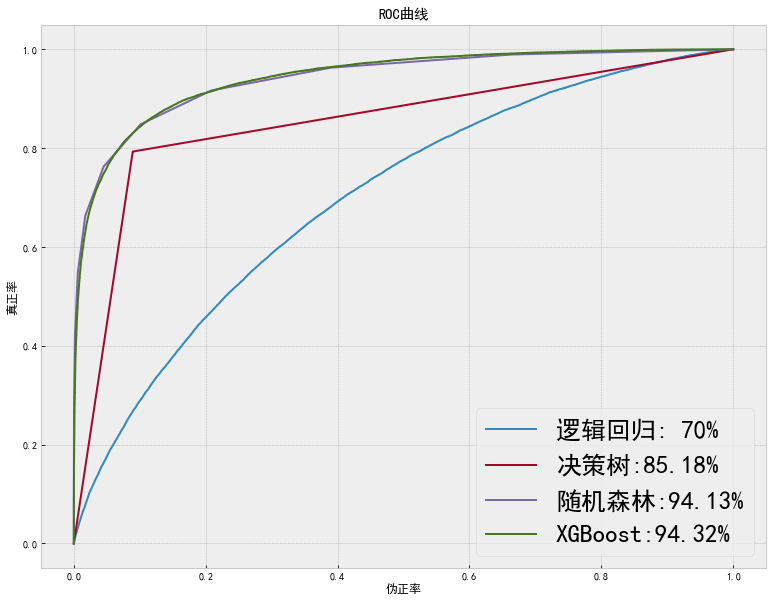

In [51]:
# 画出ROC曲线
plt.style.use('bmh')
plt.figure(figsize=(13,10))

plt.plot(fpr_lr,tpr_lr,label='逻辑回归: 70%')                             # 逻辑回归
# plt.plot(fpr_gnb,tpr_gnb,label='gnp:66.54%')                          # 朴素贝叶斯模型
# plt.plot(fpr_svc,tpr_svc,label='svc:77.76%')                          # 支持向量机模型
plt.plot(fpr_dtc,tpr_dtc,label='决策树:85.18%')                          # 决策树
plt.plot(fpr_rfc,tpr_rfc,label='随机森林:94.13%')                          # 随机森林
plt.plot(fpr_xgb,tpr_xgb,label='XGBoost:94.32%')                          # XGBoost

plt.legend(loc='lower right',prop={'size':25})
plt.xlabel('伪正率')
plt.ylabel('真正率')
plt.title('ROC曲线')
plt.show()

In [56]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,689945.0,3.449720e+05,199170.110074,0.000000,172486.000000,344972.000000,517458.000000,689944.000000
label,689945.0,2.744523e-01,0.446238,0.000000,0.000000,0.000000,1.000000,1.000000
iforderpv_24h,689945.0,1.937372e-01,0.395226,0.000000,0.000000,0.000000,0.000000,1.000000
hotelcr,689945.0,1.060506e+00,0.042354,1.000000,1.030000,1.050000,1.090000,1.190000
ordercanceledprecent,689945.0,3.421189e-01,0.285372,0.000000,0.050000,0.342119,0.400000,1.000000
landhalfhours,689945.0,5.833780e+00,12.213393,0.000000,0.000000,0.000000,3.000000,49.000000
ordercanncelednum,689945.0,9.453395e+01,262.997741,0.000000,1.000000,2.000000,5.000000,1752.000000
starprefer,689945.0,6.753230e+01,15.740052,0.000000,60.000000,67.532304,77.100000,100.000000
historyvisit_avghotelnum,689945.0,5.422116e+00,3.808442,0.000000,3.400000,5.400000,5.400000,29.000000
cancelrate,689945.0,1.011358e+03,1302.210017,1.000000,141.000000,503.000000,1351.000000,6399.000000


## xgboost重要特征

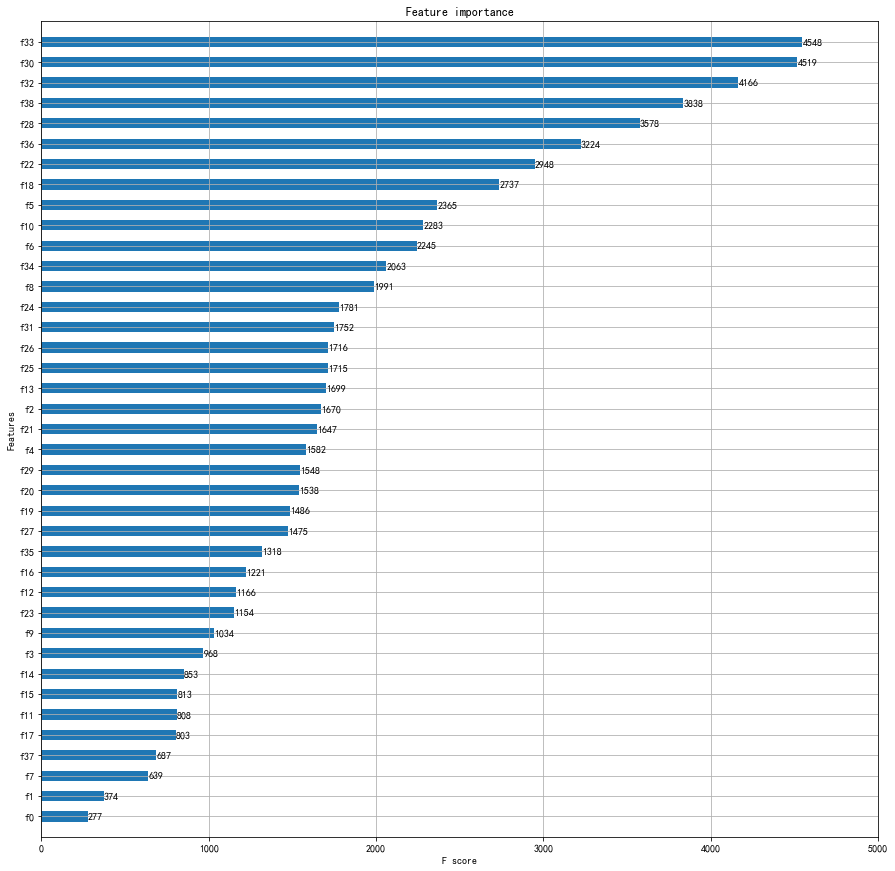

In [18]:
from xgboost import plot_importance

# plt.figure(figsize=(13,10))
fig,ax = plt.subplots(figsize=(15,15))
plot_importance(bst,height=0.5,ax=ax,max_num_features=40)

## 逻辑回归查看特征权重

In [ ]:
def train():
    lr = LogisticRegression()
    lr.fit(x_train, y_train)
    print("得出来的权重：", lr.coef_)

## 用户画像

在本案例中，我们选择lasthtlordergap（距离上次下单的时长）、ordernum_oneyear（用户年订单数）、
consume_level（用户消费水平）分别作为R、F、M的值，对我们的用户群体进行聚类


In [22]:
rfm = data[['lasthtlordergap','ordernum_oneyear','consume_level']]
rfm.rename(columns={'lasthtlordergap':'R','ordernum_oneyear':'F','consume_level':'M'},inplace=True)
rfm.head()

D:\Program Files\Anaconda3\lib\site-packages\pandas\core\frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


,R,F,M
0,101830.9194,6,-44.480995
1,101830.9194,6,-44.480995
2,101830.9194,6,-44.480995
3,101830.9194,6,-44.480995
4,101830.9194,6,-44.480995


In [23]:
rfm["F"].describe([0.01,.25,.50,.75,.90,.95,.99])

count    689945.000000
mean          9.345957
std          11.623763
min           1.000000
1%            1.000000
25%           4.000000
50%           6.000000
75%           8.000000
90%          21.000000
95%          33.000000
99%          70.000000
max          70.000000
Name: F, dtype: float64

In [25]:
rfm["R"].describe([0.01,.25,.50,.75,.90,.95,.99])

count    689945.000000
mean     101830.919401
std       98921.924830
min           0.000000
1%          360.000000
25%       29358.000000
50%      101830.919400
75%      101830.919400
90%      231892.000000
95%      341810.600000
99%      465565.000000
max      527026.000000
Name: R, dtype: float64

In [24]:
rfm["M"].describe([0.01,.25,.50,.75,.90,.95,.99])

count    6.899450e+05
mean    -3.321496e-13
std      2.148006e+02
min     -2.973360e+02
1%      -2.959498e+02
25%     -1.044443e+02
50%     -4.448099e+01
75%      2.737898e+01
90%      2.616416e+02
95%      4.469677e+02
99%      9.558176e+02
max      9.616389e+02
Name: M, dtype: float64

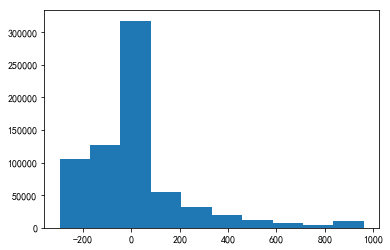

In [29]:
plt.hist(rfm['M'])
plt.show()

### 维度打分
按照设定标准，对RFM打分，分值的大小取决于我们的偏好，我们越喜欢的行为，打的分数就越高：
- R 这个值越大，用户流失的可能性越大，所以R越大，分值越小；
- FM 越大越好，得分越高

对于R，设置30天为一个跨度，区间左闭右开：

1分：[250000,无穷]
2分：[100000,250000)
3分：[50000,100000)
4分：[10000,50000)
5分：[0,10000)

F：1分：[1,3) 2分：[3,6) 3分：[6,10) 4分：[10,30) 5分：[30,无穷) 年订单次数

M：[-300,-100) 2分：[-100,-50) 3分：[-50,20) 4分：[20,30) 5分：[30,无穷) 消费水平

### 分值计算，分箱

In [30]:
rfm['R-score'] = pd.cut(rfm['R'],bins=[0,10000,50000,100000,250000,1000000],
                       labels = [5,4,3,2,1],right=False).astype(float)
rfm.head()

D:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,R,F,M,R-score,F-score,M-score
0,101830.9194,6,-44.480995,2.0,3.0,NaN
1,101830.9194,6,-44.480995,2.0,3.0,NaN
2,101830.9194,6,-44.480995,2.0,3.0,NaN
3,101830.9194,6,-44.480995,2.0,3.0,NaN
4,101830.9194,6,-44.480995,2.0,3.0,NaN


In [31]:
rfm['F-score'] = pd.cut(rfm['F'],bins=[1,3,6,10,30,1000000],labels=[1,2,3,4,5],
                       right=False).astype(float)
rfm['M-score'] = pd.cut(rfm['M'],bins=[-300,-100,-50,20,30,1000000],labels=[1,2,3,4,5],
                       right=False).astype(float)
rfm.head()

D:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
D:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,R,F,M,R-score,F-score,M-score
0,101830.9194,6,-44.480995,2.0,3.0,3.0
1,101830.9194,6,-44.480995,2.0,3.0,3.0
2,101830.9194,6,-44.480995,2.0,3.0,3.0
3,101830.9194,6,-44.480995,2.0,3.0,3.0
4,101830.9194,6,-44.480995,2.0,3.0,3.0


和均值对比，减少分类数量，变为2分类

In [32]:
rfm['R是否大于均值'] = (rfm['R-score']>rfm['R-score'].mean())*1
rfm['F是否大于均值'] = (rfm['F-score']>rfm['F-score'].mean())*1
rfm['M是否大于均值'] = (rfm['M-score']>rfm['R-score'].mean())*1

D:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
D:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
D:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://p

In [37]:
rfm.head()

,R,F,M,R-score,F-score,M-score,R是否大于均值,F是否大于均值,M是否大于均值
0,46890.0,6.0,350.0,4.0,3.0,3.0,1,1,0
1,46890.0,6.0,350.0,4.0,3.0,3.0,1,1,0
2,46890.0,6.0,350.0,4.0,3.0,3.0,1,1,0
3,46890.0,6.0,350.0,4.0,3.0,3.0,1,1,0
4,46890.0,6.0,350.0,4.0,3.0,3.0,1,1,0


### 客户分层

In [33]:
# 构建合并指标
rfm['人群数值']=(rfm['R是否大于均值']*100)+(rfm['F是否大于均值']*10)+(rfm['M是否大于均值']*1)
rfm.head()

D:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,R,F,M,R-score,F-score,M-score,R是否大于均值,F是否大于均值,M是否大于均值,人群数值
0,101830.9194,6,-44.480995,2.0,3.0,3.0,0,1,1,11
1,101830.9194,6,-44.480995,2.0,3.0,3.0,0,1,1,11
2,101830.9194,6,-44.480995,2.0,3.0,3.0,0,1,1,11
3,101830.9194,6,-44.480995,2.0,3.0,3.0,0,1,1,11
4,101830.9194,6,-44.480995,2.0,3.0,3.0,0,1,1,11


### 基于指标给客户打标签


In [34]:
def transform_label(x):
    if x==111:
        label = '重要价值客户'
    elif x==101:
        label = '频次深耕用户'
    elif x==110:
        label = '消费潜力用户'
    elif x==100:
        label = '新客户'
    elif x==11:
        label = '重要价值流失预警用户'
    elif x==10:
        label = '普通客户'
    elif x==1:
        label = '高消费唤回客户'
    elif x==0:
        label = '流失客户'
    return label

### 标签应用

In [35]:
rfm['人群类型'] = rfm['人群数值'].apply(transform_label)
rfm.head()

D:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,R,F,M,R-score,F-score,M-score,R是否大于均值,F是否大于均值,M是否大于均值,人群数值,人群类型
0,101830.9194,6,-44.480995,2.0,3.0,3.0,0,1,1,11,重要价值流失预警用户
1,101830.9194,6,-44.480995,2.0,3.0,3.0,0,1,1,11,重要价值流失预警用户
2,101830.9194,6,-44.480995,2.0,3.0,3.0,0,1,1,11,重要价值流失预警用户
3,101830.9194,6,-44.480995,2.0,3.0,3.0,0,1,1,11,重要价值流失预警用户
4,101830.9194,6,-44.480995,2.0,3.0,3.0,0,1,1,11,重要价值流失预警用户


### 人数统计

In [36]:
count = rfm['人群类型'].value_counts().reset_index()
count.columns=['客户类型','人数']
count['人数占比'] = count['人数']/count['人数'].sum()
count

,客户类型,人数,人数占比
0,重要价值流失预警用户,248962,0.360843
1,重要价值客户,104969,0.152141
2,消费潜力用户,81454,0.118059
3,频次深耕用户,57603,0.083489
4,新客户,56780,0.082296
5,高消费唤回客户,54736,0.079334
6,流失客户,50326,0.072942
7,普通客户,35115,0.050895


### 用户画像

In [46]:
# 选取出几个刻画用户的重要指标
user_feature = ['ordercanncelednum','ordercanceledprecent','consume_level','starprefer','lasthtlordergap','lastpvgap','h','sid',
                'ctrip_profits','landhalfhours','price_sensitive','delta_price2','interval','historyvisit_avghotelnum','ordernum_oneyear']
user_attributes = data[user_feature]
user_attributes.head()


,ordercanncelednum,ordercanceledprecent,consume_level,starprefer,lasthtlordergap,lastpvgap,h,sid,ctrip_profits,landhalfhours,price_sensitive,delta_price2,interval,historyvisit_avghotelnum,ordernum_oneyear
0,2,0.342119,-44.480995,67.532304,101830.9194,12049.409382,12,7,1.347,22,24.645863,69,0,5.4,6
1,2,0.342119,-44.480995,67.532304,101830.9194,12049.409382,14,33,1.347,0,24.645863,69,0,5.4,6
2,2,0.342119,-44.480995,67.532304,101830.9194,12049.409382,19,10,1.347,3,24.645863,69,1,5.4,6
3,2,0.342119,-44.480995,67.532304,101830.9194,12049.409382,16,8,1.347,2,24.645863,69,0,5.4,6
4,2,0.342119,-44.480995,67.532304,101830.9194,12049.409382,21,1,1.347,0,24.645863,69,1,5.4,6


In [47]:
# 数据标准化
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(user_attributes)

user_attributes = scaler.transform(user_attributes)


D:\Program Files\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
D:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  import sys


In [48]:
from sklearn.cluster import KMeans

Kmeans=KMeans(n_clusters=3,random_state=13)                                     # 建立KMean模型
Kmeans.fit(user_attributes)                                                     # 训练模型
k_char=Kmeans.cluster_centers_                                                  # 得到每个分类的质心
personas=pd.DataFrame(k_char.T,index=user_feature,columns=['0类','1类','2类'])  # 用户画像表
personas


,0类,1类,2类
ordercanncelednum,-0.154229,-0.232878,2.483640
ordercanceledprecent,-0.350026,-0.000445,0.533106
consume_level,1.973543,-0.321171,0.122382
starprefer,1.218862,-0.226143,0.344133
lasthtlordergap,0.038843,0.066724,-0.703534
lastpvgap,-0.147995,0.059141,-0.347978
h,0.033078,-0.002104,-0.029637
sid,0.320760,-0.153354,0.997490
ctrip_profits,0.869847,-0.280549,1.397218
landhalfhours,0.007520,-0.008029,0.066233


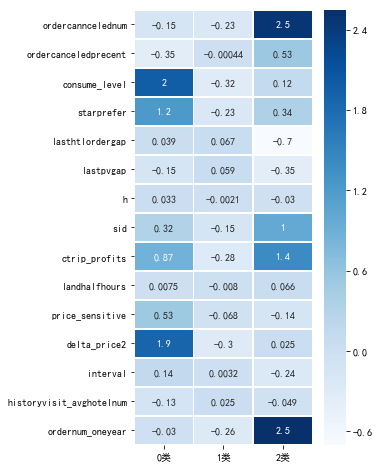

In [49]:
fig,ax = plt.subplots(figsize=(4, 8))
sns.heatmap(personas, xticklabels=True, yticklabels=True, square=False, linewidths=.5, annot=True, cmap='Blues')


我们可以看到，聚出来的3类用户有各自非常明显的特征：
可以看到，2类中蓝色格子明显最多，它的R（lasthtlordergap）为-0.7非常小，F（ordernum_oneyear）为2.5是最高的，M（consume_level）为0.12处于中等。
很明显，2类客户为我们的“高价值客户”；而1类中几乎都是白格子，无论是客户价值还是消费水平值都是最低的，很明显，这一类我们将其归为“低价值客户”；
剩下的0类我们将其称为“中等群体”。
将3类用户可视化。



<Figure size 648x648 with 0 Axes>

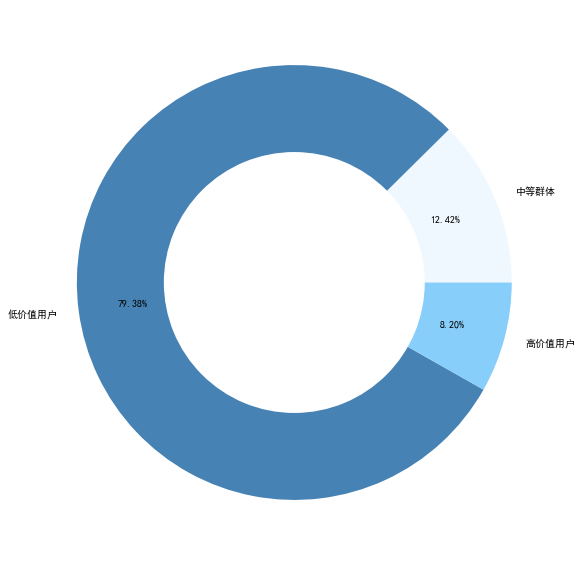

In [50]:
# 画饼图
# with plt.xkcd():
import matplotlib.pyplot as plt
plt.figure(figsize=(9,9))

class_k=list(Kmeans.labels_)                          # 每个类别的用户个数
percent=[class_k.count(0)/len(user_attributes),class_k.count(1)/len(user_attributes),class_k.count(2)/len(user_attributes)]   # 每个类别用户个数占比

fig, ax = plt.subplots(figsize=(10,10))
colors=['aliceblue','steelblue','lightskyblue']
types=['中等群体','低价值用户','高价值用户']
ax.pie(percent,radius=1,autopct='%.2f%%',pctdistance=0.75,colors=colors,labels=types)
ax.pie([1], radius=0.6,colors='w')
plt.show()

